In [1]:
import pandas as pd

import json

from copy import deepcopy

In [301]:
import warnings

In [214]:
%matplotlib inline

___
Initial exploration and helper functions

In [4]:
arxiv = pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True, nrows=10)

MemoryError: 

In [8]:
with open('tmp.txt') as f: 
    tmp = json.loads(f.read())

In [10]:
tmp.keys()

dict_keys(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed'])

In [81]:
def get_line_count(filename):
    counter = 0
    with open(filename) as f: 
        for line in f:
            counter +=1
    return counter

In [83]:
get_line_count('arxiv-metadata-oai-snapshot.json')

1796911

In [86]:
1800000/1000*0.6

1080.0

In [17]:
def read_n_entries(filename,n):
    with open(filename) as f: 
        head = [json.loads(next(f)) for x in range(n)];
    return head

In [73]:
def parse_json(entry): 
    keys = ['id','authors','title','categories','versions','authors_parsed','doi']
    keys_binary = ['journal-ref','doi','report-no']
    out = {k: deepcopy(entry[k]) for k in keys}
    out['is_published'] = any([(entry[k] != None) for k in keys_binary])
    return out

In [74]:
def read_parse_n_entries(filename,n):
    with open(filename) as f: 
        head = [parse_json(json.loads(next(f))) for x in range(n)];
    return head

In [89]:
def read_parse_all_entries_df(filename):
    out = []
    with open(filename) as f: 
        for line in f:
            out.append(parse_json(json.loads(line)))
    return pd.DataFrame(out)

In [63]:
tmpj = read_n_entries('arxiv-metadata-oai-snapshot.json',10)

In [79]:
pd.DataFrame(read_parse_n_entries('arxiv-metadata-oai-snapshot.json',1000)).info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1000 non-null   object
 1   authors         1000 non-null   object
 2   title           1000 non-null   object
 3   categories      1000 non-null   object
 4   versions        1000 non-null   object
 5   authors_parsed  1000 non-null   object
 6   doi             659 non-null    object
 7   is_published    1000 non-null   bool  
dtypes: bool(1), object(7)
memory usage: 596.4 KB


In [80]:
pd.DataFrame(read_n_entries('arxiv-metadata-oai-snapshot.json',1000)).info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1000 non-null   object
 1   submitter       1000 non-null   object
 2   authors         1000 non-null   object
 3   title           1000 non-null   object
 4   comments        901 non-null    object
 5   journal-ref     573 non-null    object
 6   doi             659 non-null    object
 7   report-no       78 non-null     object
 8   categories      1000 non-null   object
 9   license         58 non-null     object
 10  abstract        1000 non-null   object
 11  versions        1000 non-null   object
 12  update_date     1000 non-null   object
 13  authors_parsed  1000 non-null   object
dtypes: object(14)
memory usage: 1.8 MB


In [62]:
df = pd.DataFrame(read_n_entries('arxiv-metadata-oai-snapshot.json',10))

___

## Read the whole parsed json

In [90]:
%%time
arxiv = read_parse_all_entries_df('arxiv-metadata-oai-snapshot.json')

Wall time: 2min 16s


In [91]:
arxiv.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796911 entries, 0 to 1796910
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   authors         object
 2   title           object
 3   categories      object
 4   versions        object
 5   authors_parsed  object
 6   doi             object
 7   is_published    bool  
dtypes: bool(1), object(7)
memory usage: 1.1 GB


Categories statistics

In [92]:
arxiv['categories'].value_counts()

astro-ph                                         86914
hep-ph                                           73550
quant-ph                                         53966
hep-th                                           53287
cond-mat.mtrl-sci                                30107
                                                 ...  
physics.class-ph cond-mat.mtrl-sci gr-qc             1
cs.CG math.GT math.MG                                1
cs.CL cs.SI q-fin.ST                                 1
stat.ML cs.LG math.OC math.ST stat.AP stat.TH        1
math.AG cs.SC math.CV                                1
Name: categories, Length: 62055, dtype: int64

In [94]:
arxiv['categories'].apply(lambda x: len(x.split(' '))).value_counts()

1     1025259
2      502711
3      187804
4       60999
5       16025
6        3404
7         541
8         121
9          30
10         14
11          2
13          1
Name: categories, dtype: int64

So we have ca. 2/3 entries with a single classification, and rest belongs to more than 1 category

Let's look at the extreme side:

In [95]:
arxiv['categories'].apply(lambda x: len(x.split(' '))).sort_values(ascending=False).head(20)

77549      13
57365      11
1545826    11
1777614    10
1688950    10
77796      10
1677040    10
1463715    10
1638391    10
1796672    10
1772146    10
19444      10
18505      10
141660     10
1543928    10
1675693    10
1736009    10
1531230     9
1383087     9
158233      9
Name: categories, dtype: int64

In [101]:
arxiv['n_categories'] = arxiv['categories'].apply(lambda x: len(x.split(' ')))

In [97]:
arxiv.iloc[77549]['title']

'The finite harmonic oscillator and its associated sequences'

In [98]:
arxiv.iloc[57365]['title']

'Visco-potential free-surface flows and long wave modelling'

In [100]:
arxiv.iloc[1545826]

id                                                       cs/0410017
authors                    Carl S. McTague and James P. Crutchfield
title             Automated Pattern Detection--An Algorithm for ...
categories        cs.CV cond-mat.stat-mech cs.CL cs.DS cs.IR cs....
versions          [{'version': 'v1', 'created': 'Thu, 7 Oct 2004...
authors_parsed    [[McTague, Carl S., ], [Crutchfield, James P., ]]
doi                                                            None
is_published                                                   True
Name: 1545826, dtype: object

Look at the single categories

In [103]:
arxiv.query('n_categories == 1')['categories'].unique()

array(['hep-ph', 'physics.gen-ph', 'math.CO', 'cond-mat.mes-hall',
       'gr-qc', 'cond-mat.mtrl-sci', 'astro-ph', 'math.NT', 'hep-th',
       'hep-ex', 'math.NA', 'nlin.PS', 'math.RA', 'cond-mat.str-el',
       'physics.pop-ph', 'nucl-th', 'math.FA', 'cs.DS', 'math.DS',
       'physics.soc-ph', 'math.AG', 'math.OA', 'math.PR', 'math.DG',
       'physics.optics', 'math.GR', 'nlin.SI', 'math.SG',
       'physics.data-an', 'cs.CC', 'math.GT', 'quant-ph',
       'cond-mat.other', 'math.CV', 'math.AP', 'cond-mat.supr-con',
       'math.RT', 'cond-mat.stat-mech', 'q-bio.OT', 'physics.plasm-ph',
       'nlin.CG', 'nucl-ex', 'cond-mat.soft', 'physics.comp-ph',
       'math.MG', 'math.QA', 'physics.bio-ph', 'physics.chem-ph',
       'math.AT', 'physics.geo-ph', 'q-bio.BM', 'math.OC', 'cs.CR',
       'physics.class-ph', 'q-bio.PE', 'q-bio.NC', 'physics.atom-ph',
       'math.GM', 'hep-lat', 'math.CA', 'physics.atm-clus', 'cs.PF',
       'physics.acc-ph', 'math.SP', 'nlin.CD', 'physics.hist-ph'

In [108]:
versions = arxiv.iloc[0]['versions']

In [109]:
versions

[{'version': 'v1', 'created': 'Mon, 2 Apr 2007 19:18:42 GMT'},
 {'version': 'v2', 'created': 'Tue, 24 Jul 2007 20:10:27 GMT'}]

In [154]:
def extract_dt_submission(versions_list):
    tmp = pd.to_datetime([item['created'] for item in versions_list if item['version']=='v1'][0])    
    return tmp

In [156]:
arxiv.head(100)['versions'].apply(extract_dt_submission).memory_usage(deep=True)

928

In [160]:
%%time
arxiv['submitted'] = arxiv['versions'].apply(extract_dt_submission)

Wall time: 11min 25s


In [161]:
arxiv.head()['submitted']

0   2007-04-02 19:18:42+00:00
1   2007-03-31 02:26:18+00:00
2   2007-04-01 20:46:54+00:00
3   2007-03-31 03:16:14+00:00
4   2007-04-02 18:09:58+00:00
Name: submitted, dtype: datetime64[ns, UTC]

In [162]:
arxiv.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796911 entries, 0 to 1796910
Data columns (total 10 columns):
 #   Column          Dtype              
---  ------          -----              
 0   id              object             
 1   authors         object             
 2   title           object             
 3   categories      object             
 4   versions        object             
 5   authors_parsed  object             
 6   doi             object             
 7   is_published    bool               
 8   n_categories    int64              
 9   submitted       datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 1.1 GB


In [164]:
%%time
arxiv['n_versions'] = arxiv['versions'].apply(lambda x: len(x))

Wall time: 1.01 s


In [165]:
arxiv.head()

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
0,0704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,hep-ph,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...","[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",10.1103/PhysRevD.76.013009,True,1,2007-04-02 19:18:42+00:00,2
1,0704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...","[[Streinu, Ileana, ], [Theran, Louis, ]]",None,False,2,2007-03-31 02:26:18+00:00,2
2,0704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,physics.gen-ph,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...","[[Pan, Hongjun, ]]",None,False,1,2007-04-01 20:46:54+00:00,3
3,0704.0004,David Callan,A determinant of Stirling cycle numbers counts...,math.CO,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...","[[Callan, David, ]]",None,False,1,2007-03-31 03:16:14+00:00,1
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...","[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",None,True,2,2007-04-02 18:09:58+00:00,1


In [185]:
%%time
arxiv.to_pickle('arxiv.pickle')

Wall time: 29.9 s


In [192]:
arxiv['id'].value_counts()

math-ph/0409039    2
math-ph/0207039    2
math-ph/0408005    2
math-ph/0212014    2
1508.04881         1
                  ..
1703.06949         1
1806.09726         1
1310.4549          1
1301.1009          1
2001.09869         1
Name: id, Length: 1796907, dtype: int64

In [193]:
arxiv.query('id == "math-ph/0409039"')

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1681958,math-ph/0409039,"Matthew Cargo, Alfonso Gracia-Saz, R. G. Littl...",Moyal star product approach to the Bohr-Sommer...,math-ph math.MP,"[{'version': 'v1', 'created': 'Fri, 17 Sep 200...","[[Cargo, Matthew, ], [Gracia-Saz, Alfonso, ], ...",10.1088/0305-4470/38/9/010,True,2,2004-09-17 21:35:01+00:00,1
1733816,math-ph/0409039,"Matthew Cargo, Alfonso Gracia-Saz, R. G. Littl...",Moyal star product approach to the Bohr-Sommer...,math-ph math.MP math.SG,"[{'version': 'v1', 'created': 'Fri, 17 Sep 200...","[[Cargo, Matthew, ], [Gracia-Saz, Alfonso, ], ...",10.1088/0305-4470/38/9/010,True,3,2004-09-17 21:35:01+00:00,1


In [199]:
arxiv.drop(index=[1681958],inplace=True)

In [200]:
arxiv.query('id == "math-ph/0207039"')

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1680284,math-ph/0207039,Harald Schmid,Bound State Solutions of the Dirac Equation in...,math-ph gr-qc math.MP,"[{'version': 'v1', 'created': 'Fri, 26 Jul 200...","[[Schmid, Harald, ]]",10.1002/mana.200410205,True,3,2002-07-26 13:24:04+00:00,2
1725442,math-ph/0207039,Harald Schmid,Bound State Solutions of the Dirac Equation in...,math-ph gr-qc math.MP,"[{'version': 'v1', 'created': 'Fri, 26 Jul 200...","[[Schmid, Harald, ]]",10.1002/mana.200410205,True,3,2002-07-26 13:24:04+00:00,2


In [197]:
bla.drop(index=[0],inplace=True)

In [198]:
bla

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1,0704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...","[[Streinu, Ileana, ], [Theran, Louis, ]]",None,False,2,2007-03-31 02:26:18+00:00,2
2,0704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,physics.gen-ph,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...","[[Pan, Hongjun, ]]",None,False,1,2007-04-01 20:46:54+00:00,3
3,0704.0004,David Callan,A determinant of Stirling cycle numbers counts...,math.CO,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...","[[Callan, David, ]]",None,False,1,2007-03-31 03:16:14+00:00,1
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...","[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",None,True,2,2007-04-02 18:09:58+00:00,1


In [201]:
arxiv.drop(index=[1680284],inplace=True)

In [200]:
arxiv.query('id == "math-ph/0207039"')

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1680284,math-ph/0207039,Harald Schmid,Bound State Solutions of the Dirac Equation in...,math-ph gr-qc math.MP,"[{'version': 'v1', 'created': 'Fri, 26 Jul 200...","[[Schmid, Harald, ]]",10.1002/mana.200410205,True,3,2002-07-26 13:24:04+00:00,2
1725442,math-ph/0207039,Harald Schmid,Bound State Solutions of the Dirac Equation in...,math-ph gr-qc math.MP,"[{'version': 'v1', 'created': 'Fri, 26 Jul 200...","[[Schmid, Harald, ]]",10.1002/mana.200410205,True,3,2002-07-26 13:24:04+00:00,2


In [202]:
arxiv.query('id == "math-ph/0408005"')

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1681863,math-ph/0408005,"Kurt Ehlers, Jair Koiller, Richard Montgomery,...",Nonholonomic systems via moving frames: Cartan...,math-ph math.MP,"[{'version': 'v1', 'created': 'Mon, 2 Aug 2004...","[[Ehlers, Kurt, ], [Koiller, Jair, ], [Montgom...",None,True,2,2004-08-02 17:43:10+00:00,1
1733815,math-ph/0408005,"Kurt Ehlers, Jair Koiller, Richard Montgomery,...",Nonholonomic systems via moving frames: Cartan...,math-ph math.MP math.SG,"[{'version': 'v1', 'created': 'Mon, 2 Aug 2004...","[[Ehlers, Kurt, ], [Koiller, Jair, ], [Montgom...",None,True,3,2004-08-02 17:43:10+00:00,1


In [203]:
arxiv.drop(index=[1681863],inplace=True)

In [204]:
arxiv.query('id == "math-ph/0212014"')

,id,authors,title,categories,versions,authors_parsed,doi,is_published,n_categories,submitted,n_versions
1680561,math-ph/0212014,Pedro de M. Rios,A semiclassically entangled puzzle,math-ph math.MP quant-ph,"[{'version': 'v1', 'created': 'Wed, 4 Dec 2002...","[[Rios, Pedro de M., ]]",None,True,3,2002-12-04 01:34:01+00:00,1
1733814,math-ph/0212014,Pedro de M. Rios,A semiclassically entangled puzzle,math-ph math.MP math.SG quant-ph,"[{'version': 'v1', 'created': 'Wed, 4 Dec 2002...","[[Rios, Pedro de M., ]]",10.1088/1751-8113/40/49/F02,True,4,2002-12-04 01:34:01+00:00,1


In [205]:
arxiv.drop(index=[1680561],inplace=True)

In [207]:
%%time
arxiv.to_pickle('arxiv.pickle')

Wall time: 25.2 s


___

## let's look for some patterns

In [254]:
def groupby_2d(array_to_gb, df):
    return df.groupby(array_to_gb)['id'].count().unstack().fillna(0)

In [230]:
def normalize_by_rowsum(df):
    df2 = df.divide(df.sum(axis=1), axis=0)
    return df2

#### year vs. \# cross-disciplinary papers

In [255]:
year_vs_ncat = groupby_2d([arxiv['submitted'].dt.year, arxiv['n_categories']],arxiv)

year_vs_ncat2 = normalize_by_rowsum(year_vs_ncat)

<AxesSubplot:xlabel='submitted'>

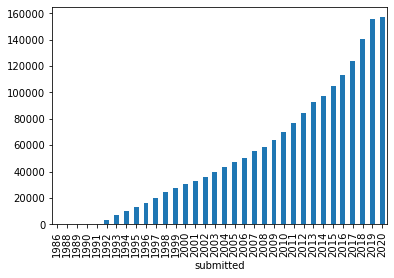

In [256]:
year_vs_ncat.sum(axis=1).plot.bar()

<AxesSubplot:xlabel='submitted'>

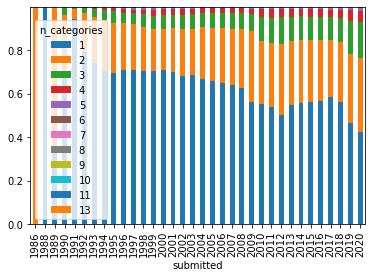

In [241]:
year_vs_ncat2.plot.bar(stacked=True)

\# papers that are cross-disciplinary increases steadily

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

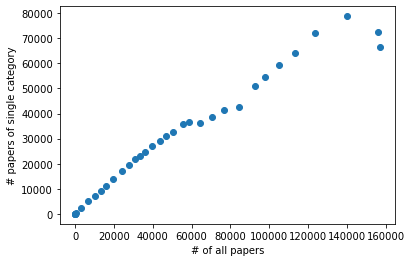

In [248]:
plt.scatter(y=year_vs_ncat[1], x=year_vs_ncat.sum(axis=1))
plt.xlabel('# of all papers');
plt.ylabel('# papers of single category');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

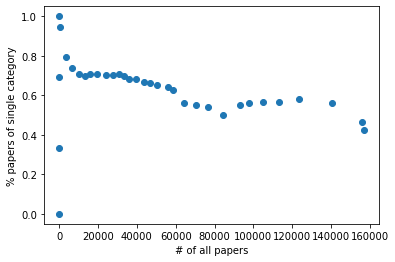

In [249]:
plt.scatter(y=year_vs_ncat[1]/year_vs_ncat.sum(axis=1), x=year_vs_ncat.sum(axis=1))
plt.xlabel('# of all papers');
plt.ylabel('% papers of single category');

#### year vs \# of papers in a discipline, only for single discipline papers

In [264]:
arxiv_tmp = arxiv.query('n_categories == 1')
year_vs_cat = groupby_2d([arxiv_tmp['submitted'].dt.year, arxiv_tmp['categories']], arxiv_tmp)

In [260]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 35


In [266]:
year_vs_cat.T

submitted,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
categories,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
astro-ph,0.0,0.0,0.0,0.0,36.0,403.0,901.0,1508.0,2201.0,3357.0,4394.0,5274.0,5913.0,6315.0,6494.0,7280.0,7565.0,8082.0,8485.0,9398.0,9308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
astro-ph.CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2478.0,2738.0,2656.0,2477.0,2499.0,1008.0,907.0,804.0,825.0,816.0,778.0,760.0
astro-ph.EP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,519.0,616.0,655.0,638.0,815.0,939.0,969.0,1061.0,1191.0,1318.0,1210.0,767.0
astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,993.0,1014.0,941.0,889.0,921.0,1880.0,2244.0,2453.0,2510.0,2751.0,2555.0,2296.0
astro-ph.HE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1109.0,1108.0,1315.0,1156.0,1454.0,1282.0,1576.0,1481.0,1853.0,1682.0,1768.0,1477.0
astro-ph.IM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,398.0,438.0,432.0,377.0,550.0,514.0,579.0,620.0,824.0,640.0,435.0
astro-ph.SR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1875.0,2159.0,2206.0,1954.0,2134.0,2359.0,2207.0,1907.0,1700.0,1908.0,1381.0,1199.0
cond-mat,0.0,0.0,0.0,0.0,187.0,592.0,1104.0,1482.0,1571.0,617.0,646.0,645.0,604.0,583.0,668.0,739.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cond-mat.dis-nn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,118.0,166.0,190.0,184.0,186.0,239.0,209.0,274.0,251.0,229.0,144.0,143.0,123.0,135.0,109.0,109.0,104.0,103.0,105.0,129.0,143.0,115.0,92.0,89.0


The problem is that some categories disappear once they split into enough subcategories -> look just at the disciplines (encoded before the dot)

In [263]:
arxiv_tmp['categories'].apply(lambda x: x.split('.')[0]).unique()

array(['hep-ph', 'physics', 'math', 'cond-mat', 'gr-qc', 'astro-ph',
       'hep-th', 'hep-ex', 'nlin', 'nucl-th', 'cs', 'quant-ph', 'q-bio',
       'nucl-ex', 'hep-lat', 'stat', 'q-fin', 'eess', 'econ'],
      dtype=object)

In [265]:
arxiv_tmp = arxiv.query('n_categories == 1')
year_vs_disc = groupby_2d([arxiv_tmp['submitted'].dt.year, arxiv_tmp['categories'].apply(lambda x: x.split('.')[0])], arxiv_tmp)

In [267]:
year_vs_disc

categories,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,hep-ph,hep-th,math,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
submitted,,,,,,,,,,,,,,,,,,,
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,286.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,36.0,187.0,0.0,0.0,0.0,54.0,0.0,241.0,646.0,1172.0,160.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0
1993,403.0,596.0,6.0,0.0,0.0,268.0,0.0,267.0,1507.0,1517.0,169.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0.0
1994,901.0,1113.0,15.0,0.0,0.0,456.0,53.0,316.0,2062.0,1626.0,254.0,0.0,3.0,304.0,0.0,0.0,0.0,11.0,0.0
1995,1508.0,1489.0,26.0,0.0,0.0,515.0,139.0,311.0,2436.0,1753.0,268.0,0.0,16.0,367.0,0.0,0.0,0.0,239.0,0.0
1996,2201.0,2085.0,29.0,0.0,0.0,567.0,142.0,415.0,2698.0,1948.0,267.0,0.0,39.0,473.0,37.0,0.0,0.0,369.0,0.0


In [268]:
year_vs_disc2 = normalize_by_rowsum(year_vs_disc)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

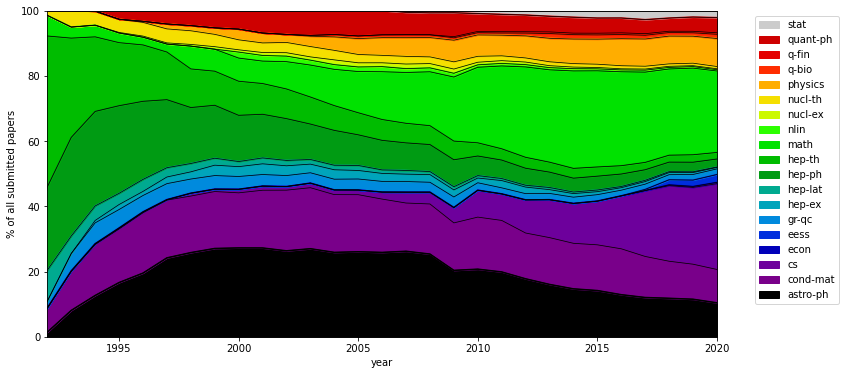

In [314]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    ax = year_vs_disc2.plot.area(stacked=True, colormap="nipy_spectral", figsize=(12,6), legend=True);
    year_vs_disc2.rename(columns=dict(zip(year_vs_disc2.columns,["_"+c for c in year_vs_disc2.columns])))\
        .plot.line(stacked=True, color="k", lw=0.75, ax=ax);
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1))
    plt.xlim([1992,2020])
    plt.ylim([0,1])
    plt.ylabel('% of all submitted papers')
    ax.set_yticklabels([str(round(tick*100)) for tick in ax.get_yticks()])
    plt.xlabel('year')

Note: cond-mat is misleadingly close to cs -> most of the disciplines are anyway related to physics, look for a way to fish out: econ, eess, astro-ph, cs, math, nlin, q-bio, q-fin, stat from the rest -> use colors 


#### submissions that happen on a particular day of week

In [ ]:
submissions_dow_norm = normalize_by_rowsum( 
    groupby_2d([arxiv['submitted'].dt.year, arxiv['submitted'].dt.dayofweek], arxiv)
)

In [324]:
num_to_dow = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

submitted      1994      2020
submitted                    
Mon        0.173646  0.183578
Tue        0.193689  0.177590
Wed        0.198750  0.171289
Thu        0.180294  0.170422
Fri        0.180393  0.146289
Sat        0.043362  0.072386
Sun        0.029867  0.078445


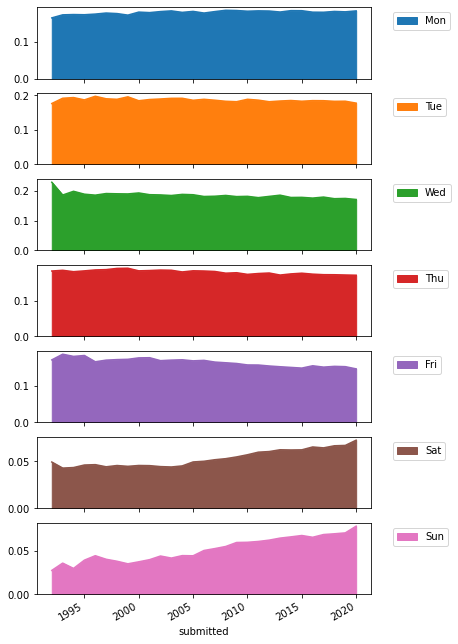

In [325]:
submissions_dow_norm_tmp = submissions_dow_norm.rename(columns=num_to_dow)
print(submissions_dow_norm_tmp.loc[[1994,2020]].T)
axes = submissions_dow_norm_tmp.loc[1992:].plot.area(subplots=True,figsize=(6,12), legend=True);
[ax.legend(bbox_to_anchor=(1.05, 1)) for ax in axes];

Scientists submit on weekends increasingly more than 25 years ago


#### submissions in 2019,  day of week vs discipline (only papers belonging to a single discipline)

In [392]:
def weekday_sub_prop(year, metric="all"):
    arxiv_tmp = arxiv[arxiv['submitted'].dt.year==year].query('n_categories == 1')
    dow_vs_disc = groupby_2d([arxiv_tmp['submitted'].dt.dayofweek, arxiv_tmp['categories'].apply(lambda x: x.split('.')[0])], arxiv_tmp)
    dow_vs_disc = dow_vs_disc.T
    dow_vs_disc['weekend'] = (dow_vs_disc[5]+dow_vs_disc[6])/2
    dow_vs_disc['weekday'] = (dow_vs_disc[[0,1,2,3,4]].sum(axis=1))/5
    dow_vs_disc['total'] = dow_vs_disc[range(7)].sum(axis=1)
    dow_vs_disc['prop'] = dow_vs_disc['weekend']/dow_vs_disc['weekday']
    if metric != "all":
        tmp = dow_vs_disc[metric]
        tmp.name = year
    else: 
        tmp = dow_vs_disc
    return tmp

In [389]:
weekday_sub_prop(2019)

submitted,0,1,2,3,4,5,6,weekend,weekday,all,prop
categories,,,,,,,,,,,
astro-ph,1562,1639,1617,1483,1311,360,360,360.0,1522.4,8332,0.236469
cond-mat,1420,1404,1334,1407,1296,401,508,454.5,1372.2,7770,0.331220
cs,2947,3088,2859,2901,2528,1354,1347,1350.5,2864.6,17024,0.471445
econ,33,42,47,33,26,18,25,21.5,36.2,224,0.593923
eess,251,249,237,245,226,92,100,96.0,241.6,1400,0.397351
gr-qc,235,215,204,227,180,78,106,92.0,212.2,1245,0.433553
hep-ex,65,72,57,94,89,28,30,29.0,75.4,435,0.384615
hep-lat,40,30,24,28,30,5,10,7.5,30.4,167,0.246711
hep-ph,437,355,367,384,335,105,134,119.5,375.6,2117,0.318158


In [395]:
weekday_prop_disc_props = pd.DataFrame([weekday_sub_prop(y,'prop') for y in np.arange(1990,2021,1)]).fillna(0)

<IPython.core.display.Javascript object>

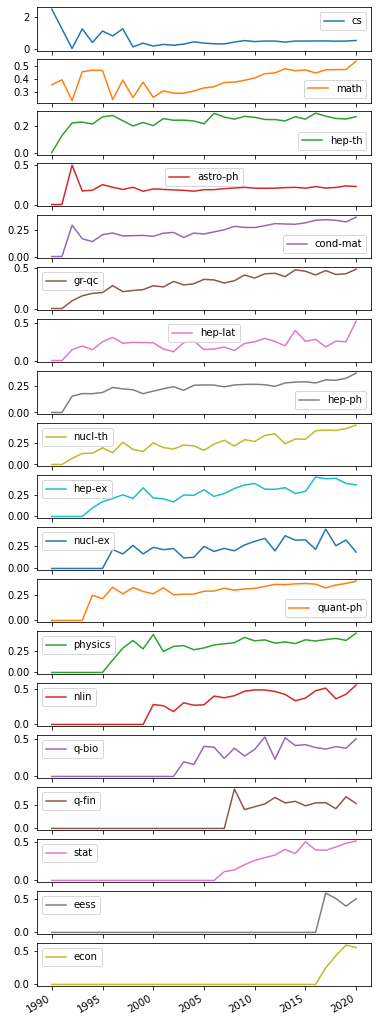

In [396]:
weekday_prop_disc_props.plot.line(subplots=True, figsize=(6,20));

In [390]:
sunday_disc_props = pd.DataFrame([weekday_sub_prop(y,6) for y in np.arange(1990,2021,1)]).fillna(0)

<IPython.core.display.Javascript object>

In [397]:
weekend_disc_props = pd.DataFrame([weekday_sub_prop(y,"weekend")*2 for y in np.arange(1990,2021,1)]).fillna(0)

<IPython.core.display.Javascript object>

In [393]:
total_disc_props = pd.DataFrame([weekday_sub_prop(y,"total") for y in np.arange(1990,2021,1)]).fillna(0)

<IPython.core.display.Javascript object>

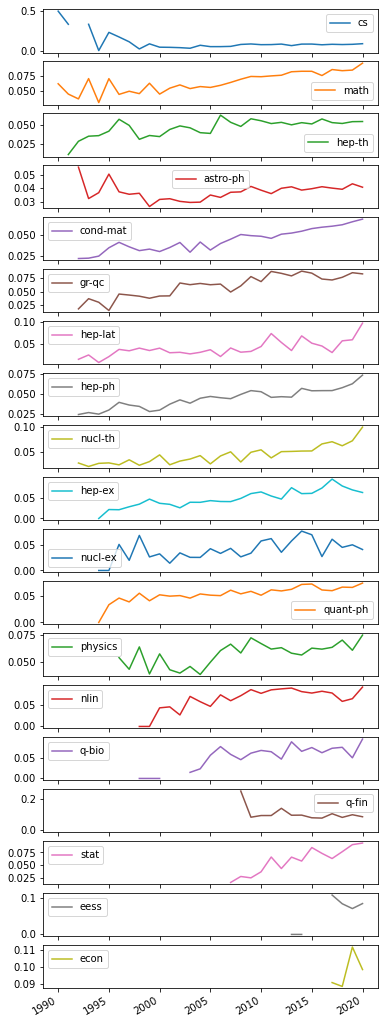

In [394]:
(sunday_disc_props/total_disc_props).plot.line(subplots=True, figsize=(6,20));

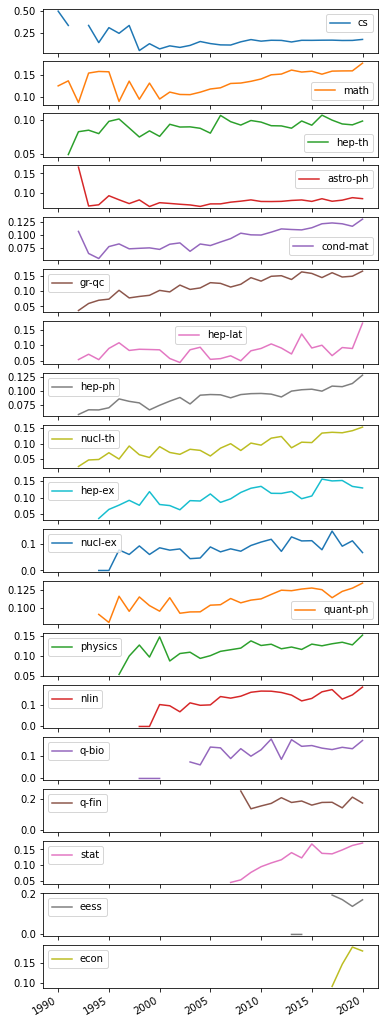

In [398]:
(weekend_disc_props/total_disc_props).plot.line(subplots=True, figsize=(6,20));